In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import seaborn as sns

In [2]:
# 폰트 지정해주기 
import matplotlib.font_manager as fm
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
file_path = './'
f_A = os.path.join(file_path, '20191208_all_data_final_A.xlsx')
f_B = os.path.join(file_path, '20191208_all_data_final_B.xlsx')

In [4]:
data_A_0 = pd.read_excel(f_A,sheet_name= 'all responses', header=1,  skiprows=[2])
data_A_0 = data_A_0.rename(columns={'귀하의 성별은?': "성별", '귀하의 연령대는?': "나이", 
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다)": "act_1_gen",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).1": "dra_1_gen",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).2": "act_2_art",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).3": "dra_2_art",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).4": "act_3_gen",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).5": "dra_3_gen",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).6": "act_4_art",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).7": "dra_4_art"},
                errors="raise")

data_A_0 = data_A_0[['성별', '나이', 
                 "act_1_gen", "dra_1_gen",
                 "act_2_art", "dra_2_art", 
                 "act_3_gen", "dra_3_gen", 
                 "act_4_art", "dra_4_art"
                ]]
data_A_list_tmp = [ "act_1_gen", "dra_1_gen",
                 "act_2_art", "dra_2_art", 
                 "act_3_gen", "dra_3_gen", 
                 "act_4_art", "dra_4_art"]


In [5]:
data_B_0 = pd.read_excel(f_B,sheet_name= 'all responses', header=1,  skiprows=[2])
data_B_0 = data_B_0.rename(columns={'귀하의 성별은?': "성별", '귀하의 연령대는?': "나이", 
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다)": "act_1_art",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).1": "dra_1_art",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).2": "act_2_gen",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).3": "dra_2_gen",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).4": "act_3_art",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).5": "dra_3_art",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).6": "act_4_gen",
                "이 영화를 보고싶은 의향이 있으십니까?(1점 : 별로 보고 싶지 않다 ~\xa0 10점 : 반드시 보러 가겠다).7": "dra_4_gen"},
                errors="raise")
data_B_0 = data_B_0[['성별', '나이', 
                 "act_1_art", "dra_1_art",
                 "act_2_gen", "dra_2_gen", 
                 "act_3_art", "dra_3_art", 
                 "act_4_gen", "dra_4_gen"
                ]]
data_B_list_tmp = [  "act_1_art", "dra_1_art",
                 "act_2_gen", "dra_2_gen", 
                 "act_3_art", "dra_3_art", 
                 "act_4_gen", "dra_4_gen"]

In [6]:
# 나이 그룹핑 
def age_1(df):
    df['나이'] = df['나이'].apply(lambda x: str(int(str(x)[:1])*10) + "대")
    return df 
data_A_0 = age_1(data_A_0)
data_B_0 = age_1(data_B_0)

In [7]:
# 무성의 응답자 제거 

In [8]:
data_A_0['var_tmp'] = data_A_0[data_A_list_tmp].var(axis = 1)
data_B_0['var_tmp'] = data_B_0[data_B_list_tmp].var(axis = 1)

In [9]:
data_A = data_A_0[data_A_0['var_tmp']!=0]
data_B = data_B_0[data_B_0['var_tmp']!=0]

In [10]:

data_A_list = ["act_1_gen", "act_2_art", "act_3_gen", "act_4_art"]
data_A = data_A[['성별', '나이'] +data_A_list]

data_B_list = ["act_1_art", "act_2_gen", "act_3_art","act_4_gen"]
data_B = data_B[['성별', '나이']+data_B_list]


In [11]:
data_A

,성별,나이,act_1_gen,act_2_art,act_3_gen,act_4_art
0,여성,30대,3,5,3,6
1,여성,40대,7,1,1,1
2,남성,20대,2,5,4,5
3,남성,20대,10,8,5,7
4,남성,50대,2,4,2,6
...,...,...,...,...,...,...
283,남성,20대,6,3,5,4
284,여성,20대,3,3,5,8
285,남성,20대,9,9,8,7
286,남성,30대,5,6,8,6


In [12]:
data_B

,성별,나이,act_1_art,act_2_gen,act_3_art,act_4_gen
0,여성,20대,6,8,5,3
1,여성,20대,8,9,8,7
2,남성,30대,9,10,2,1
3,남성,20대,5,6,7,3
4,여성,30대,5,9,4,8
...,...,...,...,...,...,...
288,여성,10대,5,8,3,4
289,남성,20대,6,6,6,5
290,남성,20대,3,4,3,2
291,남성,40대,8,10,10,9


In [13]:
data_art_col = ['act_1_art', 'act_2_art', 'act_3_art', 'act_4_art']
data_gen_col = ['act_1_gen', 'act_2_gen', 'act_3_gen', 'act_4_gen']

In [14]:
# 평균, 합, 분산 구하기 
data_A['mean'] = data_A[data_A_list].mean(axis = 1)
data_B['mean'] = data_B[data_B_list].mean(axis = 1)
data_A['sum'] = data_A[data_A_list].sum(axis = 1)
data_B['sum'] = data_B[data_B_list].sum(axis = 1)
data_A['var'] = data_A[data_A_list].var(axis = 1)
data_B['var'] = data_B[data_B_list].var(axis = 1)

In [15]:
data_A.describe()

,act_1_gen,act_2_art,act_3_gen,act_4_art,mean,sum,var
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,5.560976,5.452962,5.571429,5.052265,5.409408,21.637631,3.677120
std,2.595506,2.343802,2.400674,2.278062,1.753014,7.012056,3.689085
min,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000
25%,3.000000,4.000000,4.000000,3.000000,4.250000,17.000000,0.916667
50%,6.000000,6.000000,6.000000,5.000000,5.500000,22.000000,2.916667
75%,7.000000,7.000000,7.000000,7.000000,6.625000,26.500000,4.916667
max,10.000000,10.000000,10.000000,10.000000,10.000000,40.000000,19.000000


In [16]:
data_B.describe()

,act_1_art,act_2_gen,act_3_art,act_4_gen,mean,sum,var
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,5.712281,6.150877,5.873684,5.210526,5.736842,22.947368,3.108772
std,2.409201,2.290913,2.343295,2.418654,1.837369,7.349478,3.521613
min,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000
25%,4.000000,5.000000,4.000000,3.000000,4.750000,19.000000,0.916667
50%,6.000000,6.000000,6.000000,5.000000,6.000000,24.000000,1.666667
75%,8.000000,8.000000,8.000000,7.000000,7.000000,28.000000,4.250000
max,10.000000,10.000000,10.000000,10.000000,10.000000,40.000000,21.666667


# 분석 
1. box plot, distribution plot으로 확인
2. 등분산 확인 levene test
3. t test 

In [17]:
class analysis():
    def __init__(self, d_a, d_b):
        self.change_to_art_gen(d_a, d_b)
        self.lev = True
        
    def change_to_art_gen(self, d_a, d_b):
        self.d_art = pd.concat([d_a[['나이', '성별']+["act_2_art", "act_4_art"]], 
                                d_b[['나이', '성별']+["act_1_art", "act_3_art"]]],
                                ignore_index = True)
        self.d_gen = pd.concat([d_a[['나이', '성별']+["act_1_gen", "act_3_gen" ]],
                                d_b[['나이', '성별']+["act_2_gen", "act_4_gen" ]]],
                                ignore_index = True)
        self.d_art['mean'] = self.d_art.mean(axis = 1)
        self.d_gen['mean'] = self.d_gen.mean(axis = 1)
    def mean(self):
        a = round(self.d_art['mean'].mean(axis = 0), 2)
        b = round(self.d_gen['mean'].mean(axis = 0), 2)
        print('art:', a)
        print('gen:', b)
        print('차이: ', round(abs(a-b),2))
        
    def plt_box(self):
        %matplotlib inline

        plt.figure(figsize=(6, 6))
        plt.grid()
        plt.boxplot([self.d_art['mean'], self.d_gen['mean']])
        plt.xlabel('art / gen')
        plt.ylabel('score')
        plt.title('Box Plot')
        plt.grid()
        plt.show()
    
    def plt_dist(self, xlabel):
        x1 = self.d_art['mean']
        x2 = self.d_gen['mean']
        ax = sns.distplot(x1,bins = 10, kde=False, fit=sp.stats.norm, label="예술", color='lightcoral')
        ax = sns.distplot(x2,bins = 10,  kde=False, fit=sp.stats.norm, label="일반", color='teal')
        ax.lines[0].set_linestyle(":")
        ax.set_xlabel(xlabel)
        plt.legend()
        plt.show()

    def levene_test(self, p = 0.05):
        self.lev = True if sp.stats.levene(self.d_art['mean'], self.d_gen['mean']).pvalue >= p else False 
        return sp.stats.levene(self.d_art['mean'], self.d_gen['mean'])
        
    def t_test(self,):
        tTestResult = sp.stats.ttest_ind(self.d_art['mean'], self.d_gen['mean'], equal_var = self.lev)
        print(tTestResult)
        return tTestResult
    

## A, B 그룹 -> generator 에 따른 그룹 
평가글 제너레이터에 따라 구분 지어주기. gen, art

In [18]:
analysis_ab = analysis(data_A, data_B)

/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [19]:
analysis_ab.d_art.describe()

,act_1_art,act_2_art,act_3_art,act_4_art,mean
count,285.000000,287.000000,285.000000,287.000000,572.000000
mean,5.712281,5.452962,5.873684,5.052265,5.521853
std,2.409201,2.343802,2.343295,2.278062,2.000428
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,3.000000,4.000000
50%,6.000000,6.000000,6.000000,5.000000,5.500000
75%,8.000000,7.000000,8.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [20]:
analysis_ab.d_gen.describe()

,act_1_gen,act_2_gen,act_3_gen,act_4_gen,mean
count,287.000000,285.000000,287.000000,285.000000,572.000000
mean,5.560976,6.150877,5.571429,5.210526,5.623252
std,2.595506,2.290913,2.400674,2.418654,2.081131
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.000000,4.000000,3.000000,4.500000
50%,6.000000,6.000000,6.000000,5.000000,6.000000
75%,7.000000,8.000000,7.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


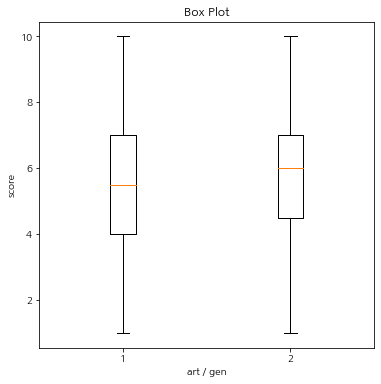

In [21]:
analysis_ab.plt_box()

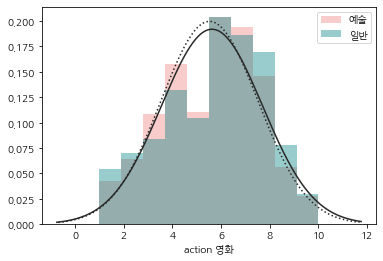

In [22]:
analysis_ab.plt_dist('action 영화')

In [23]:
analysis_ab.mean()

art: 5.52
gen: 5.62
차이:  0.1


In [24]:
levene = analysis_ab.levene_test(0.05)
levene.pvalue 

0.3488911194197686

In [25]:
analysis_ab.t_test()

Ttest_indResult(statistic=-0.8401060243474152, pvalue=0.4010247874408305)


Ttest_indResult(statistic=-0.8401060243474152, pvalue=0.4010247874408305)

#### 유의 확률 88%이므로 두 기대값이 같다는 귀무가설을 기각할 수 없음.

## 성별 - 여성, 남성


In [26]:
data_w_A = data_A[data_A['성별']=='여성']
data_w_B = data_B[data_B['성별']=='여성']
data_m_A = data_A[data_A['성별']=='남성']
data_m_B = data_B[data_B['성별']=='남성']

In [27]:
print('data_A', len(data_A))
print('data_w_A', len(data_w_A))
print('data_m_A', len(data_m_A))
print('data_B', len(data_B))
print('data_w_B', len(data_w_B))
print('data_m_B', len(data_m_B))

data_A 287
data_w_A 121
data_m_A 166
data_B 285
data_w_B 106
data_m_B 179


## 여성인 경우 
* 이상치 제거된 상태
* 여성인 경우로 한정지어 위의 분석 과정을 진행할 것

In [28]:
analysis_ab_w = analysis(data_w_A, data_w_B)

/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


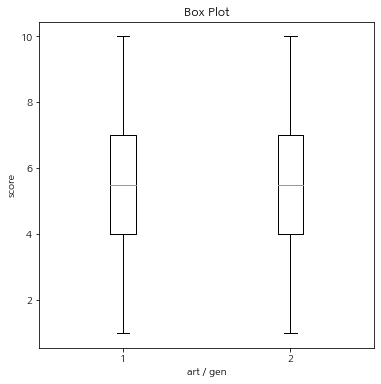

In [29]:
analysis_ab_w.plt_box()

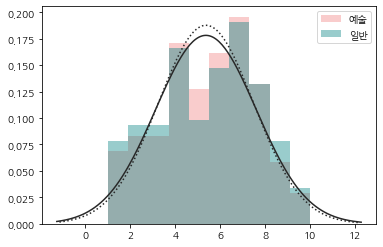

In [30]:
analysis_ab_w.plt_dist('')

In [31]:
analysis_ab_w.mean()

art: 5.37
gen: 5.36
차이:  0.01


In [32]:
analysis_ab_w.levene_test(0.05)

LeveneResult(statistic=1.2096655646959333, pvalue=0.2719837918645367)

In [33]:
analysis_ab_w.t_test()

Ttest_indResult(statistic=0.010724840576581898, pvalue=0.9914477112440541)


Ttest_indResult(statistic=0.010724840576581898, pvalue=0.9914477112440541)

## 남성인 경우
* 이상치 제거된 상태
* 남성인 경우로 한정지어 위의 분석 과정을 진행할 것

In [34]:
analysis_ab_m = analysis(data_m_A, data_m_B)

/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [35]:
analysis_ab_m.d_art.describe()

,act_1_art,act_2_art,act_3_art,act_4_art,mean
count,179.000000,166.000000,179.000000,166.000000,345.000000
mean,5.737430,5.801205,5.893855,5.036145,5.624638
std,2.342403,2.307353,2.274657,2.176713,1.906339
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,5.000000,3.250000,4.500000
50%,6.000000,6.000000,6.000000,5.000000,5.500000
75%,8.000000,8.000000,8.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [36]:
analysis_ab_m.d_gen.describe()

,act_1_gen,act_2_gen,act_3_gen,act_4_gen,mean
count,166.000000,179.000000,166.000000,179.000000,345.000000
mean,5.897590,6.335196,5.680723,5.262570,5.794203
std,2.545655,2.205570,2.348537,2.276725,1.950990
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,5.000000,4.000000,4.000000,4.500000
50%,6.000000,7.000000,6.000000,5.000000,6.000000
75%,8.000000,8.000000,7.000000,7.000000,7.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000


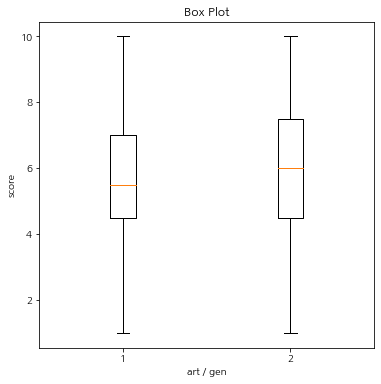

In [37]:
analysis_ab_m.plt_box()

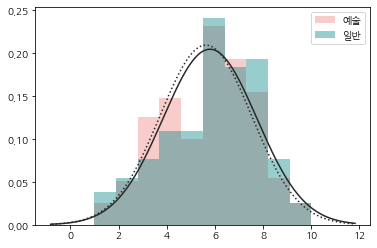

In [38]:
analysis_ab_m.plt_dist('')

In [39]:
analysis_ab_m.mean()

art: 5.62
gen: 5.79
차이:  0.17


In [40]:
analysis_ab_m.levene_test()

LeveneResult(statistic=0.00965452938067243, pvalue=0.921756471858274)

In [41]:
analysis_ab_m.t_test()

Ttest_indResult(statistic=-1.1546371158018973, pvalue=0.24863994573260736)


Ttest_indResult(statistic=-1.1546371158018973, pvalue=0.24863994573260736)

## 연령별

In [42]:
data_A

,성별,나이,act_1_gen,act_2_art,act_3_gen,act_4_art,mean,sum,var
0,여성,30대,3,5,3,6,4.25,17,2.250000
1,여성,40대,7,1,1,1,2.50,10,9.000000
2,남성,20대,2,5,4,5,4.00,16,2.000000
3,남성,20대,10,8,5,7,7.50,30,4.333333
4,남성,50대,2,4,2,6,3.50,14,3.666667
...,...,...,...,...,...,...,...,...,...
283,남성,20대,6,3,5,4,4.50,18,1.666667
284,여성,20대,3,3,5,8,4.75,19,5.583333
285,남성,20대,9,9,8,7,8.25,33,0.916667
286,남성,30대,5,6,8,6,6.25,25,1.583333


### 20 대

In [43]:
data_A_age_20 = data_A[data_A['나이'].isin(['10대', '20대'])]
data_B_age_20 = data_B[data_B['나이'].isin(['10대', '20대'])]

In [44]:
analysis_ab_age_20 = analysis(data_A_age_20, data_B_age_20)

/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [45]:
analysis_ab_age_20.d_art.describe()

,act_1_art,act_2_art,act_3_art,act_4_art,mean
count,86.000000,91.000000,86.000000,91.000000,177.000000
mean,5.744186,5.065934,5.755814,4.593407,5.276836
std,2.159445,2.220121,2.410448,2.440301,1.987797
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,4.250000,2.500000,4.000000
50%,6.000000,5.000000,6.000000,5.000000,5.500000
75%,7.000000,7.000000,8.000000,6.500000,6.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [46]:
analysis_ab_age_20.d_gen.describe()

,act_1_gen,act_2_gen,act_3_gen,act_4_gen,mean
count,91.000000,86.000000,91.000000,86.000000,177.000000
mean,5.329670,6.023256,5.725275,5.093023,5.542373
std,2.624902,2.201479,2.499182,2.283588,2.113851
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.000000,5.000000,3.000000,4.500000
50%,5.000000,6.000000,6.000000,5.000000,5.500000
75%,7.000000,7.000000,7.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


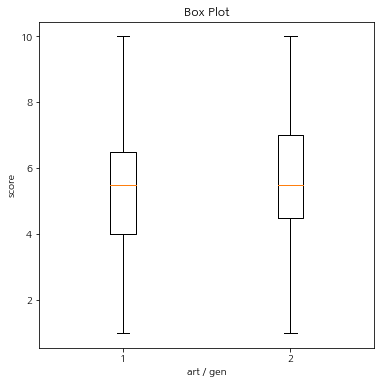

In [47]:
analysis_ab_age_20.plt_box()

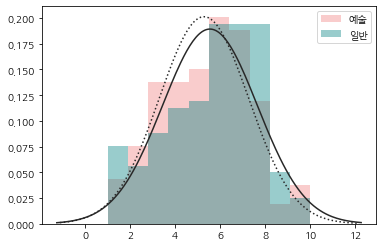

In [48]:
analysis_ab_age_20.plt_dist('')

In [49]:
analysis_ab_age_20.mean()

art: 5.28
gen: 5.54
차이:  0.26


In [50]:
analysis_ab_age_20.levene_test()

LeveneResult(statistic=0.6004770203602393, pvalue=0.4389163022970993)

In [51]:
analysis_ab_age_20.t_test()

Ttest_indResult(statistic=-1.2174830156165892, pvalue=0.224236037368822)


Ttest_indResult(statistic=-1.2174830156165892, pvalue=0.224236037368822)

### 30 대 

In [52]:
data_A_age_30 = data_A[data_A['나이']=='30대']
data_B_age_30 = data_B[data_B['나이']=='30대']

In [53]:
analysis_ab_age_30 = analysis(data_A_age_30, data_B_age_30)

/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [54]:
analysis_ab_age_30.d_art.describe()

,act_1_art,act_2_art,act_3_art,act_4_art,mean
count,104.000000,114.000000,104.000000,114.000000,218.000000
mean,5.538462,5.500000,6.048077,5.175439,5.555046
std,2.553973,2.435904,2.261453,2.223151,1.959662
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.750000,4.000000,4.500000
50%,6.000000,6.000000,7.000000,5.000000,5.500000
75%,8.000000,7.000000,8.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [55]:
analysis_ab_age_30.d_gen.describe()

,act_1_gen,act_2_gen,act_3_gen,act_4_gen,mean
count,114.000000,104.000000,114.000000,104.000000,218.000000
mean,5.578947,6.028846,5.552632,5.201923,5.589450
std,2.610038,2.415391,2.417093,2.490291,2.024625
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000,3.000000,4.000000
50%,6.000000,6.000000,6.000000,5.000000,6.000000
75%,7.000000,8.000000,7.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


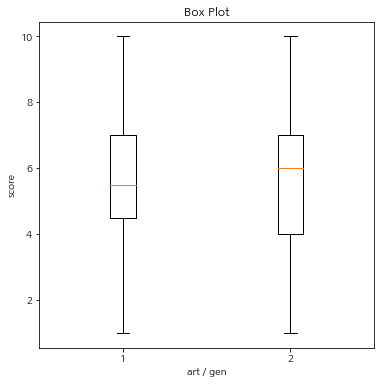

In [56]:
analysis_ab_age_30.plt_box()

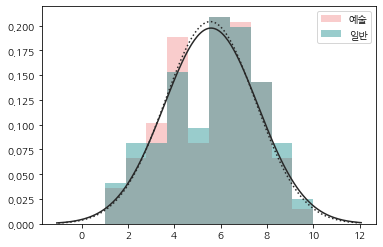

In [57]:
analysis_ab_age_30.plt_dist('')

In [58]:
analysis_ab_age_30.mean()

art: 5.56
gen: 5.59
차이:  0.03


In [59]:
analysis_ab_age_30.levene_test()

LeveneResult(statistic=0.11689086296781559, pvalue=0.7325968640716469)

In [60]:
analysis_ab_age_30.t_test()

Ttest_indResult(statistic=-0.18027676531412948, pvalue=0.8570194416013889)


Ttest_indResult(statistic=-0.18027676531412948, pvalue=0.8570194416013889)

### 40대

In [61]:
data_A_age_40 = data_A[data_A['나이']=='40대']
data_B_age_40 = data_B[data_B['나이']=='40대']

analysis_ab_age_40 = analysis(data_A_age_40, data_B_age_40)

/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [62]:
analysis_ab_age_40.d_art.describe()

,act_1_art,act_2_art,act_3_art,act_4_art,mean
count,76.000000,61.000000,76.000000,61.000000,137.000000
mean,5.868421,5.557377,5.868421,5.262295,5.664234
std,2.462206,2.284182,2.418496,2.015785,2.070548
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000
50%,6.000000,6.000000,6.000000,5.000000,5.500000
75%,8.000000,7.000000,8.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [63]:
analysis_ab_age_40.d_gen.describe()

,act_1_gen,act_2_gen,act_3_gen,act_4_gen,mean
count,61.000000,76.000000,61.000000,76.000000,137.000000
mean,5.590164,6.421053,5.475410,5.315789,5.718978
std,2.376111,2.222690,2.070479,2.509770,2.026353
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,5.000000,4.000000,3.000000,4.500000
50%,6.000000,7.000000,6.000000,5.000000,5.500000
75%,7.000000,8.000000,7.000000,7.250000,7.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000


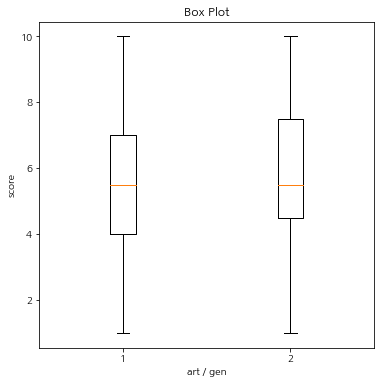

In [64]:
analysis_ab_age_40.plt_box()

/home/yun/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yun/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


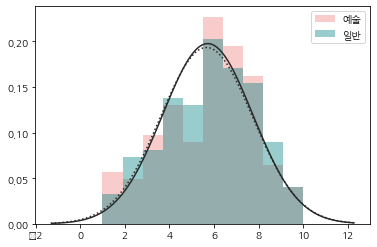

In [65]:
analysis_ab_age_40.plt_dist('')

In [66]:
analysis_ab_age_40.mean()

art: 5.66
gen: 5.72
차이:  0.06


In [67]:
analysis_ab_age_40.levene_test()

LeveneResult(statistic=0.005390788094462151, pvalue=0.9415242856812976)

In [68]:
analysis_ab_age_40.t_test()

Ttest_indResult(statistic=-0.2211746013588753, pvalue=0.8251224273079182)


Ttest_indResult(statistic=-0.2211746013588753, pvalue=0.8251224273079182)

### 50대 이상 

In [69]:
data_A_age_50 = data_A[data_A['나이']=='50대']
data_B_age_50 = data_B[data_B['나이']=='50대']

analysis_ab_age_50 = analysis(data_A_age_50, data_B_age_50)

/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
/home/yun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [70]:
data_A_age_50

,성별,나이,act_1_gen,act_2_art,act_3_gen,act_4_art,mean,sum,var
4,남성,50대,2,4,2,6,3.50,14,3.666667
5,여성,50대,8,8,3,9,7.00,28,7.333333
49,남성,50대,5,5,6,5,5.25,21,0.250000
79,남성,50대,7,6,5,4,5.50,22,1.666667
98,남성,50대,9,5,5,7,6.50,26,3.666667
115,남성,50대,8,8,8,7,7.75,31,0.250000
154,남성,50대,3,3,3,5,3.50,14,1.000000
155,여성,50대,1,1,1,1,1.00,4,0.000000
175,남성,50대,8,6,8,6,7.00,28,1.333333
181,남성,50대,8,9,7,8,8.00,32,0.666667


In [71]:
analysis_ab_age_50.d_art.describe()

,act_1_art,act_2_art,act_3_art,act_4_art,mean
count,17.000000,17.000000,17.000000,17.000000,34.000000
mean,5.941176,6.294118,5.882353,5.705882,5.955882
std,2.221221,2.443479,1.996320,2.365500,1.970878
min,2.000000,1.000000,3.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000,5.000000,4.500000
50%,6.000000,6.000000,6.000000,6.000000,6.000000
75%,8.000000,8.000000,7.000000,7.000000,7.500000
max,9.000000,10.000000,9.000000,9.000000,9.000000


In [72]:
analysis_ab_age_50.d_gen.describe()

,act_1_gen,act_2_gen,act_3_gen,act_4_gen,mean
count,17.000000,17.000000,17.000000,17.000000,34.000000
mean,6.529412,6.882353,5.176471,5.764706,6.088235
std,2.981561,1.691240,2.877397,2.222876,2.251163
min,1.000000,3.000000,1.000000,2.000000,1.000000
25%,5.000000,6.000000,3.000000,4.000000,4.750000
50%,8.000000,8.000000,5.000000,6.000000,6.250000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,9.000000,9.000000,9.000000,9.500000


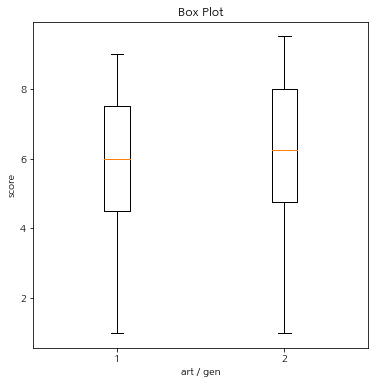

In [73]:
analysis_ab_age_50.plt_box()

/home/yun/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yun/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


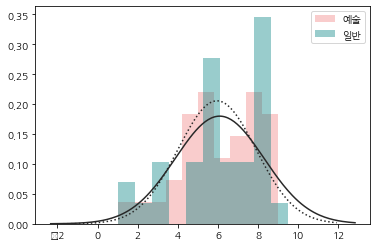

In [74]:
analysis_ab_age_50.plt_dist('')

In [75]:
analysis_ab_age_50.mean()

art: 5.96
gen: 6.09
차이:  0.13


In [76]:
analysis_ab_age_50.levene_test()

LeveneResult(statistic=0.12307809407824598, pvalue=0.7268370805188666)

In [77]:
analysis_ab_age_50.t_test()

Ttest_indResult(statistic=-0.2579352672392242, pvalue=0.7972594551655183)


Ttest_indResult(statistic=-0.2579352672392242, pvalue=0.7972594551655183)